<a href="https://colab.research.google.com/github/Arus3107/Machine-learning-for-NLP-1/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#POS tagging with a Perceptron

##1 Corpus reading

In [ ]:
!pip install conllu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from io import open
from conllu import parse_incr
from pygments import token

In [ ]:
def examples_flat(filename):
  data = open(filename, "r", encoding="utf-8")
  token_lists = []
  for tokenlist in parse_incr(data):
    token_lists.append(tokenlist.filter(id=lambda x: type(x) is int))
  tokens = [token for token_list in token_lists for token in token_list]
  return [[token["form"], token["upos"]] for token in tokens]

def examples(filename):
  data = open(filename, "r", encoding="utf-8")
  token_lists = []
  for tokenlist in parse_incr(data):
    token_lists.append(tokenlist.filter(id=lambda x: type(x) is int))
  examples = []
  for sentence in token_lists:
    observation = [word["form"] for word in sentence]
    labels = [word["upos"] for word in sentence]
    examples.append([observation, labels])
  return examples

In [ ]:
print(examples_flat("fr_gsd-ud-test.conllu.txt"))
train_flat = examples_flat("fr_gsd-ud-train.conllu.txt")
test_flat = examples_flat("fr_gsd-ud-test.conllu.txt")
dev_flat = examples_flat("fr_gsd-ud-dev.conllu.txt")

[['Je', 'PRON'], ['sens', 'VERB'], ["qu'", 'SCONJ'], ['entre', 'ADP'], ['ça', 'PRON'], ['et', 'CCONJ'], ['les', 'DET'], ['films', 'NOUN'], ['de', 'ADP'], ['médecins', 'NOUN'], ['et', 'CCONJ'], ['scientifiques', 'NOUN'], ['fous', 'ADJ'], ['que', 'PRON'], ['nous', 'PRON'], ['avons', 'AUX'], ['déjà', 'ADV'], ['vus', 'VERB'], [',', 'PUNCT'], ['nous', 'PRON'], ['pourrions', 'VERB'], ['emprunter', 'VERB'], ['un', 'DET'], ['autre', 'ADJ'], ['chemin', 'NOUN'], ['pour', 'ADP'], ["l'", 'DET'], ['origine', 'NOUN'], ['.', 'PUNCT'], ['On', 'PRON'], ['pourra', 'VERB'], ['toujours', 'ADV'], ['parler', 'VERB'], ['à', 'ADP'], ['propos', 'NOUN'], ["d'", 'ADP'], ['Averroès', 'PROPN'], ['de', 'ADP'], ['"', 'PUNCT'], ['décentrement', 'NOUN'], ['de', 'ADP'], ['le', 'DET'], ['Sujet', 'NOUN'], ['"', 'PUNCT'], ['.', 'PUNCT'], ['«', 'PUNCT'], ['Il', 'PRON'], ['a', 'AUX'], ['été', 'AUX'], ['largement', 'ADV'], ['démontré', 'VERB'], ['que', 'SCONJ'], ['la', 'DET'], ['population', 'NOUN'], ['civile', 'ADJ'], ['de'

In [ ]:
print(examples("fr_gsd-ud-test.conllu.txt"))
train = examples("fr_gsd-ud-train.conllu.txt")
test = examples("fr_gsd-ud-test.conllu.txt")
dev = examples("fr_gsd-ud-dev.conllu.txt")

[[['Je', 'sens', "qu'", 'entre', 'ça', 'et', 'les', 'films', 'de', 'médecins', 'et', 'scientifiques', 'fous', 'que', 'nous', 'avons', 'déjà', 'vus', ',', 'nous', 'pourrions', 'emprunter', 'un', 'autre', 'chemin', 'pour', "l'", 'origine', '.'], ['PRON', 'VERB', 'SCONJ', 'ADP', 'PRON', 'CCONJ', 'DET', 'NOUN', 'ADP', 'NOUN', 'CCONJ', 'NOUN', 'ADJ', 'PRON', 'PRON', 'AUX', 'ADV', 'VERB', 'PUNCT', 'PRON', 'VERB', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT']], [['On', 'pourra', 'toujours', 'parler', 'à', 'propos', "d'", 'Averroès', 'de', '"', 'décentrement', 'de', 'le', 'Sujet', '"', '.'], ['PRON', 'VERB', 'ADV', 'VERB', 'ADP', 'NOUN', 'ADP', 'PROPN', 'ADP', 'PUNCT', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT', 'PUNCT']], [['«', 'Il', 'a', 'été', 'largement', 'démontré', 'que', 'la', 'population', 'civile', 'de', 'le', 'territoire', 'non', 'autonome', 'de', 'le', 'Sahara', 'occidental', 'est', "l'", 'objet', 'de', 'diverses', 'atteintes', 'à', 'les', 'droits', 'humains', ',', 'comme

In [ ]:
print("Nombre d'exemples (train): " + str(len(train)))
print("Nombre d'exemples (test): " + str(len(test)))
print("Nombre d'exemples (dev): " + str(len(dev)))

Nombre d'exemples (train): 14450
Nombre d'exemples (test): 416
Nombre d'exemples (dev): 1476


In [ ]:
pos_tags = ["ADJ", "ADP", "ADV", "AUX", "CCONJ", "DET", "INTJ", "NOUN", "NUM", 
            "PRON", "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X"]
def pos_tags_dist(filename):
  pos_tags_dist = {"ADJ":0, "ADP":0, "ADV":0, "AUX":0, "CCONJ":0, "DET":0, 
                   "INTJ":0, "NOUN":0, "NUM":0, "PRON":0, "PROPN":0, "PUNCT":0, 
                   "SCONJ":0, "SYM":0, "VERB":0, "X":0}
  corpus = examples_flat(filename)
  for example in corpus:
    pos_tags_dist[example[1]] += 1
  return pos_tags_dist

In [ ]:
print(pos_tags_dist("fr_gsd-ud-train.conllu.txt"))

{'ADJ': 20964, 'ADP': 56470, 'ADV': 12801, 'AUX': 11465, 'CCONJ': 9297, 'DET': 54148, 'INTJ': 69, 'NOUN': 66434, 'NUM': 9242, 'PRON': 15697, 'PROPN': 25196, 'PUNCT': 39010, 'SCONJ': 2601, 'SYM': 618, 'VERB': 28312, 'X': 2234}


In [ ]:
# PLOT pos tags distribution
test_dist = pos_tags_dist("fr_gsd-ud-test.conllu.txt")
train_dist = pos_tags_dist("fr_gsd-ud-train.conllu.txt")
dev_dist = pos_tags_dist("fr_gsd-ud-dev.conllu.txt")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

(array([20964., 56470., 12801., 11465.,  9297., 54148.,    69., 66434.,
         9242., 15697., 25196., 39010.,  2601.,   618., 28312.,  2234.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <a list of 16 Patch objects>)

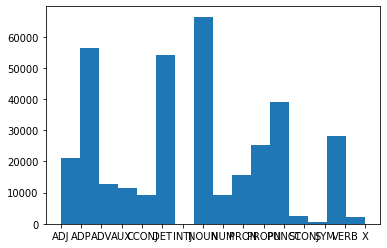

In [ ]:
X = pos_tags
Y_train = [train_dist[tag] for tag in pos_tags]
plt.hist(X, bins=len(X), weights=Y_train, histtype='bar')

(array([ 608., 1480.,  495.,  356.,  249., 1479.,    8., 1859.,  225.,
         553.,  503., 1186.,  128.,   39.,  824.,   23.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <a list of 16 Patch objects>)

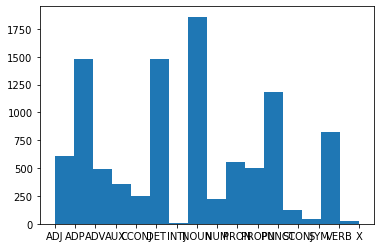

In [ ]:
X = pos_tags
Y_train = [test_dist[tag] for tag in pos_tags]
plt.hist(X, bins=len(X), weights=Y_train, histtype='bar')

(array([2.209e+03, 5.740e+03, 1.258e+03, 1.125e+03, 9.310e+02, 5.509e+03,
        6.000e+00, 6.758e+03, 9.520e+02, 1.544e+03, 2.606e+03, 3.802e+03,
        2.530e+02, 6.100e+01, 2.775e+03, 1.750e+02]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <a list of 16 Patch objects>)

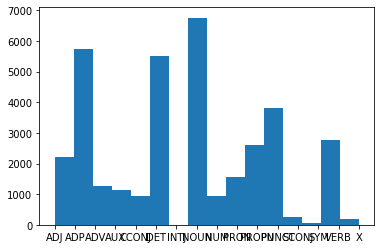

In [ ]:
X = pos_tags
Y_train = [dev_dist[tag] for tag in pos_tags]
plt.hist(X, bins=len(X), weights=Y_train, histtype='bar')

## 2 Feature extraction

On considère une représentation sparse pour les features car plusieurs features vont régulièrement avoir une valeur nulle et en considérant le nombre d'observations que l'on considère cela fera un grand nombre de zéros à stocker.

Le rôle d'un mot dans la phrase et sa catégorie lexicale ont des relations avec les autres mots de la phrase et notamment les mots proches, il semble donc pertinent de considérer les mots qui entourent un mot pour le caractériser.

In [ ]:
def previous_word(list, index):
  return str(list[index-1]) if index-1 >= 0 else "bos"

def next_word(list, index):
  return str(list[index+1]) if index+1 < len(list) else "eos"

def word_after_next_word(list, index):
  return str(list[index+2]) if index+2 < len(list) else "eos"

def word_before_previous_word(list, index):
  return str(list[index-2]) if index-2 >= 0 else "bos"

def starts_with_upper(word):
  return "starts_with_upper" if word[0].isupper() else "starts_with_lower"

def contains_number(word):
  return "contains_number" if any(char.isdigit() for char in word) else "no_digit"

def examples_features(corpus):
  examples = []
  for sentence in corpus:
    features = []
    words, labels = sentence
    for index, word in enumerate(words):
      feature = [word, previous_word(words, index), next_word(words, index), 
                 word_after_next_word(words, index), 
                 word_before_previous_word(words, index), "bias",
                 starts_with_upper(word), contains_number(word)]
      features.append(feature)
    examples.append([features, labels])
  return examples

In [ ]:
print(examples_features(test)[0])

[[['Je', 'bos', 'sens', "qu'", 'bos', 'bias', 'starts_with_upper', 'no_digit'], ['sens', 'Je', "qu'", 'entre', 'bos', 'bias', 'starts_with_lower', 'no_digit'], ["qu'", 'sens', 'entre', 'ça', 'Je', 'bias', 'starts_with_lower', 'no_digit'], ['entre', "qu'", 'ça', 'et', 'sens', 'bias', 'starts_with_lower', 'no_digit'], ['ça', 'entre', 'et', 'les', "qu'", 'bias', 'starts_with_lower', 'no_digit'], ['et', 'ça', 'les', 'films', 'entre', 'bias', 'starts_with_lower', 'no_digit'], ['les', 'et', 'films', 'de', 'ça', 'bias', 'starts_with_lower', 'no_digit'], ['films', 'les', 'de', 'médecins', 'et', 'bias', 'starts_with_lower', 'no_digit'], ['de', 'films', 'médecins', 'et', 'les', 'bias', 'starts_with_lower', 'no_digit'], ['médecins', 'de', 'et', 'scientifiques', 'films', 'bias', 'starts_with_lower', 'no_digit'], ['et', 'médecins', 'scientifiques', 'fous', 'de', 'bias', 'starts_with_lower', 'no_digit'], ['scientifiques', 'et', 'fous', 'que', 'médecins', 'bias', 'starts_with_lower', 'no_digit'], ['f

La dimension du feature vector pour une phrase est de (n,8) avec n le nombre de mots de la phrase. Comme la plupart des mots n'ont pas de nombres et ne commencent pas par une majuscule, il y a en général 2*n zéros. A cela doit être rajouté les zéros qui proviennent du début de phrase et de la fin de phrase soit 5 zéros supplémentaires (en enlevant le zéro pour le premier mot qui a une majuscule). Il y a donc en général 2*n + 5 zéros.

## 3 Perceptron

### 3.1 Implementing a perceptron from scratch

### 3.2 Using sklearn implementation